In [ ]:
#@title Import transformers files
!pip install transformers
!pip install transformers[torch]
from transformers import AutoTokenizer, AutoModelForSequenceClassification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_path ="/content/drive/MyDrive/GP storage/Datasets/topic modeling/TopicModelingDataAll.csv"
new_df = pd.read_csv(data_path)

In [ ]:
#@title Count the no. of categories in dataset && Drop Null Values
import numpy as np

T_dataset=new_df[['Content','Categories']].dropna()
categories_count=T_dataset['Categories'].value_counts()

In [ ]:
#@title Cleaning the dataframe entries
import nltk
from nltk.stem import ISRIStemmer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import re

def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

punct = '()١٢٣٤٥٦٧٨٩٠1234567890ـ.،؛:\-+`؟!«»?"%/'
def clean_punct(text):
    pattern = r'[a-zA-Z]'
    text = re.sub(pattern, '', text)
    words=text.split()
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
      punctuation_filtered.append(regex.sub('', w))

    filtered_list = strip_list_noempty(punctuation_filtered)

    return ' '.join(map(str, filtered_list))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#@title Appling lemmatizatiion and removing stopwords
from nltk.tokenize import word_tokenize
def lemmatize_arabic_text(text):
    stemmer = ISRIStemmer()
    words = text.split()
    lemmatized_words = [stemmer.stem(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text


def remove_arabic_stopwords(text):
    stop_words = set(stopwords.words('arabic'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

In [ ]:
#@title Encoding Labels and Shuffling Data
my_df = T_dataset
my_df=my_df.sample(frac=1).reset_index(drop=True)
my_df['Categories'].unique()
#encoding the labels
my_df['encoded_text'] = my_df['Categories'].astype('category').cat.codes
#select fixed number of each category
result = my_df.groupby('Categories').head(9000)
#shuffling data
result = result.sample(frac=1).reset_index(drop=True)
categories_count=result['Categories'].value_counts()
print(categories_count)

سياسة              9000
وزارة الثقافة      9000
وزارة الماليه      9000
وزارة الرياضة      9000
وزارة الاوقاف      6500
وزارة الاتصالات    6500
وزارة الصحة        6500
Name: Categories, dtype: int64


In [ ]:
#@title Applying previous preprocessing on the "Content" Column
result['Content'] = result['Content'].apply(lambda x: str(x))
result['Content'] = result['Content'].apply(lambda x: clean_punct(x))
result['Content'] = result['Content'].apply(lambda x: remove_arabic_stopwords(x))
result['Content'] = result['Content'].apply(lambda x: lemmatize_arabic_text(x))

In [ ]:
categories_order =result['Categories'].unique()
categories_order.sort()
print(list(categories_order))

['سياسة', 'وزارة الاتصالات', 'وزارة الاوقاف', 'وزارة الثقافة', 'وزارة الرياضة', 'وزارة الصحة', 'وزارة الماليه']


In [ ]:
result

,Content,Categories,encoded_text
0,اعل صدر سور رسم رئس زرء ترك طيب رجب ردغ يقم زي...,سياسة,0
1,فلح قئد قلم وقي دنة إقليم شوك ايت بها بمع سلط ...,وزارة الثقافة,3
2,علماء قلل علم علم علموه‮ ‬لم‮ ‬يخش في‮ ‬الحق ل...,وزارة الاوقاف,2
3,كسح جهز شرك ابل وقع شبك سوق جهز شغل ملف مدى سن...,وزارة الاتصالات,1
4,دبي غيث خور اعل هرج طير امر ادب خلل حفل خاص قم...,وزارة الثقافة,3
...,...,...,...
55495,اصر حقق حلم طفل ظل رود طيل درس صبح دكتور دير ن...,وزارة الاوقاف,2
55496,لقي شخص صرع أصب اخر جرح خطر حثة سير وقع دخل جن...,وزارة الثقافة,3
55497,اعل نفد خدم ام دتا يكس عبر ولى نظم حوسب علي اد...,وزارة الاتصالات,1
55498,ايد غرف جني استئنافية حكم ئنف كنس اخر قرر مطع ...,وزارة الثقافة,3


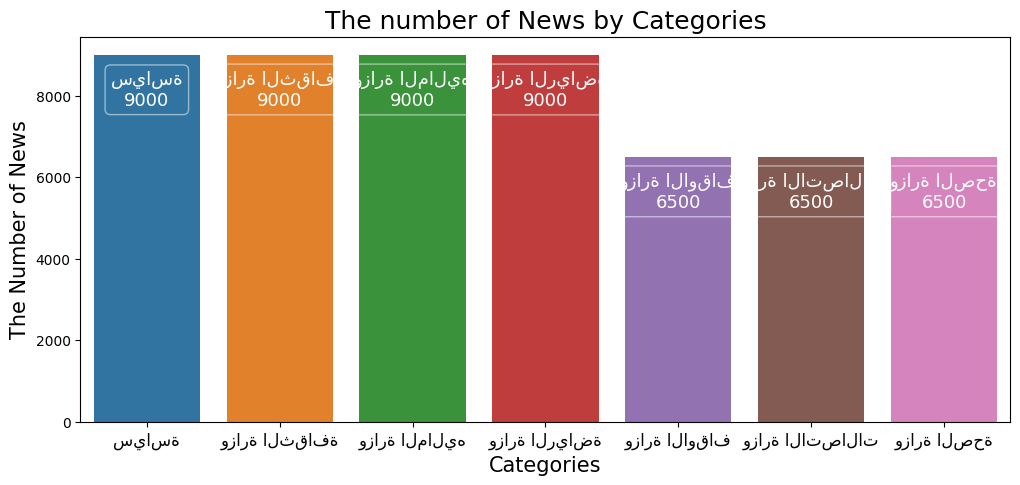

In [ ]:
#@title Plotting the Distribution of Dataset
import matplotlib.pyplot as plt
from plotly.offline import iplot
import seaborn as sns

categories =categories_count.index

fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = categories_count.index, y = categories_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of News', size= 15)

plt.xticks(size = 12)

plt.title("The number of News by Categories" , size = 18)

plt.show()

In [ ]:
#@title Appling Train_Test Split
from sklearn.model_selection import train_test_split
X = result['Content'].to_list()

Y = result['encoded_text'].to_list()

X_train,X_val,Y_train,Y_val =train_test_split(X,Y,test_size=0.2,stratify=Y)

In [ ]:
#@title Load the MARBERT model "tokenizer"
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERT")
train_encodings = tokenizer(X_train, return_tensors="pt",truncation=True, padding=True,max_length=256)
val_encodings = tokenizer(X_val, return_tensors="pt",truncation=True, padding=True,max_length=256)


In [ ]:
train_encodings['input_ids'][2]

tensor([    2,  5262, 73410,  2501,  3430,  1031,  2853,  1025,  2536,  1100,
         3457, 14958, 16459, 10493,  2671,  6993,  3503,  2622,  1025,  3932,
         4111,  4373,  1014, 23575,  2853,  1025,  4111,  6838,  6220,  4682,
         2501,  4683,  6137,  6994,  4294,  4682,  4925,  5340,  4302,  5947,
         8873,  2169,  5910,  3814,  5118,  7771,  1046,  6993,   126,  2088,
        22654, 24649,  4327,  1011,  4925,  2501, 59168,  5701,  5420, 51713,
        12812, 36835, 34437,  4963,  4925,  3663, 21215,  6220, 24840,  2853,
         1025, 22065,  2331,  4491,  3717,  6742, 45035, 19467,  6993,  5127,
         2536,  1100,   228,  2853,  1025, 11212,  1031, 17023,  1021, 35107,
         3814, 29177,  4691,  4302, 95877,  2112,  2501,  3430,  1031, 17593,
         2501, 67880,  5910,  3814,  5994, 16459, 10141, 16459, 19399, 69569,
         2307, 16315, 22151, 21971, 68059,  2545, 55872,  1947,  1031,  3733,
            3,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
#@title Prepare Torch Dataset Embeddings
import torch
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])


In [ ]:
train_dataset = Dataset(train_encodings , Y_train)
val_dataset = Dataset(val_encodings , Y_val)

In [ ]:
#@title Compute Metrics
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred,average='macro')
    precision = precision_score(y_true=labels, y_pred=pred,average='macro')
    f1 = f1_score(y_true=labels, y_pred=pred,average='macro')

    return {"f1": f1, "recall": recall, "precision": precision, "accuracy": accuracy}

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("UBC-NLP/MARBERT", num_labels=7)

Some weights of the model checkpoint at UBC-NLP/MARBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at U

In [ ]:
#@title Setting HyperParameters
warmup_proportion = 0.1
max_grad_norm = 1.0
training_step	= len(train_dataset) * 5
warmup_step = training_step * 0.1
eval_step =warmup_step/5
print(warmup_step)
print(eval_step)

22200.0
4440.0


In [ ]:
#@title FineTuning MARBERT
from transformers import AdamW, get_linear_schedule_with_warmup, Trainer, TrainingArguments

# Define the optimizer and learning rate scheduler
num_epochs = 5
optimizer = AdamW(model.parameters(), lr=5e-5)
len_DataLoader =len(train_dataset)/32
num_train_steps = len_DataLoader * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_train_steps)


training_args = TrainingArguments(
    output_dir='./results',
    save_strategy = 'epoch',
    evaluation_strategy='epoch',
    num_train_epochs=num_epochs,
    per_device_train_batch_size=32,
    warmup_steps=0,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    logging_dir='./logs',
    greater_is_better=False
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)
trainer.optimizer = optimizer    # learning rate
trainer.lr_scheduler = scheduler # learning rate scheduler


In [ ]:
trainer.train()

<ipython-input-16-a664f78c1e28>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,F1,Recall,Precision,Accuracy
1,0.249300,0.205089,0.941984,0.941221,0.943698,0.940000
2,0.154900,0.185931,0.950802,0.951777,0.950423,0.949279
3,0.098800,0.246665,0.951636,0.952619,0.951299,0.950270
4,0.059300,0.257425,0.957378,0.958303,0.956648,0.955856
5,0.031200,0.257811,0.958783,0.959286,0.958324,0.956937


<class 'transformers.trainer_utils.EvalPrediction'>


<ipython-input-16-a664f78c1e28>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



<class 'transformers.trainer_utils.EvalPrediction'>


<ipython-input-16-a664f78c1e28>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



<class 'transformers.trainer_utils.EvalPrediction'>


<ipython-input-16-a664f78c1e28>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



<class 'transformers.trainer_utils.EvalPrediction'>


<ipython-input-16-a664f78c1e28>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



<class 'transformers.trainer_utils.EvalPrediction'>


TrainOutput(global_step=6940, training_loss=0.12549956827411046, metrics={'train_runtime': 11125.7204, 'train_samples_per_second': 19.954, 'train_steps_per_second': 0.624, 'total_flos': 2.92613678155776e+16, 'train_loss': 0.12549956827411046, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

<ipython-input-16-a664f78c1e28>:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.18593083322048187,
 'eval_f1': 0.9508022391033625,
 'eval_recall': 0.9517765567765568,
 'eval_precision': 0.950422637369092,
 'eval_accuracy': 0.9492792792792792,
 'eval_runtime': 190.4355,
 'eval_samples_per_second': 58.287,
 'eval_steps_per_second': 7.289,
 'epoch': 5.0}

In [ ]:
#@title Save Model
save_directory = "/content/drive/MyDrive/GP storage/Models Notebooks/Topic_Classification_task/Other Notebooks/Ziad Elsayed/Pre_trainned/pretrained_v14"

model.save_pretrained(save_directory)

tokenizer.save_pretrained(save_directory)

('/content/drive/MyDrive/GP storage/Models Notebooks/Topic_Classification_task/Other Notebooks/Ziad Elsayed/Pre_trainned/pretrained_v14/tokenizer_config.json',
 '/content/drive/MyDrive/GP storage/Models Notebooks/Topic_Classification_task/Other Notebooks/Ziad Elsayed/Pre_trainned/pretrained_v14/special_tokens_map.json',
 '/content/drive/MyDrive/GP storage/Models Notebooks/Topic_Classification_task/Other Notebooks/Ziad Elsayed/Pre_trainned/pretrained_v14/vocab.txt',
 '/content/drive/MyDrive/GP storage/Models Notebooks/Topic_Classification_task/Other Notebooks/Ziad Elsayed/Pre_trainned/pretrained_v14/added_tokens.json',
 '/content/drive/MyDrive/GP storage/Models Notebooks/Topic_Classification_task/Other Notebooks/Ziad Elsayed/Pre_trainned/pretrained_v14/tokenizer.json')

In [ ]:
#@title Load The Pretrained "Saved" Model
from transformers import pipeline

save_directory = "/content/drive/MyDrive/GP storage/Models Notebooks/Topic_Classification_task/Other Notebooks/Ziad Elsayed/Pre_trainned/pretrained_v14_best"

tokenizer_fine_tuned = AutoTokenizer.from_pretrained(save_directory)


model_fine_tuned = AutoModelForSequenceClassification.from_pretrained(save_directory)

In [ ]:
preict = pipeline('text-classification',model=save_directory)

In [ ]:
#sentence =my_df['content'].to_list()
#sentence=sentence[45]
sentence=['متى بتضيفون بن رنامج لدولة الجزائر 😞😞']

In [ ]:
preict(sentence)

[{'label': 'سياسة', 'score': 0.9292725920677185}]